In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from scipy.cluster.hierarchy import dendrogram, linkage # to run the linkage method and create dendrograms
from sklearn.cluster import AgglomerativeClustering # to perform agglomerative clustering
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../../examples/EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
df.drop(df.iloc[:,5:15], axis=1, inplace=True)
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True)
df.columns = list(map(str, df.columns))

df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Water_source_type,Flow_regime,Altitude,Geological_typology,Actual_river_slope,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,Pluvial,Permanent,199,Siliceous,0.001,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,Groundwater,Permanent,1253,Calcareous,13.406,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,Groundwater,Permanent,1155,Calcareous,9.398,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,Groundwater,Permanent,1074,Calcareous,8.186,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,Groundwater,Permanent,1018,Calcareous,11.736,...,0,0,0,0,0,0,0,0,0,0


## 1. Run agglomerative cluster analysis using different linkage methods based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins.

In [4]:
envi_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

filt_basins = (df['Catchment_name'] == 'Douro') | (df['Catchment_name'] == 'Tejo')
basins_df = df.loc[filt_basins, envi_vars].dropna()
basins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 1 to 4951
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Altitude              888 non-null    int64  
 1   Actual_river_slope    888 non-null    float64
 2   Elevation_mean_catch  888 non-null    float64
 3   prec_ann_catch        888 non-null    float64
 4   temp_ann              888 non-null    float64
 5   temp_jan              888 non-null    float64
 6   temp_jul              888 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 55.5 KB


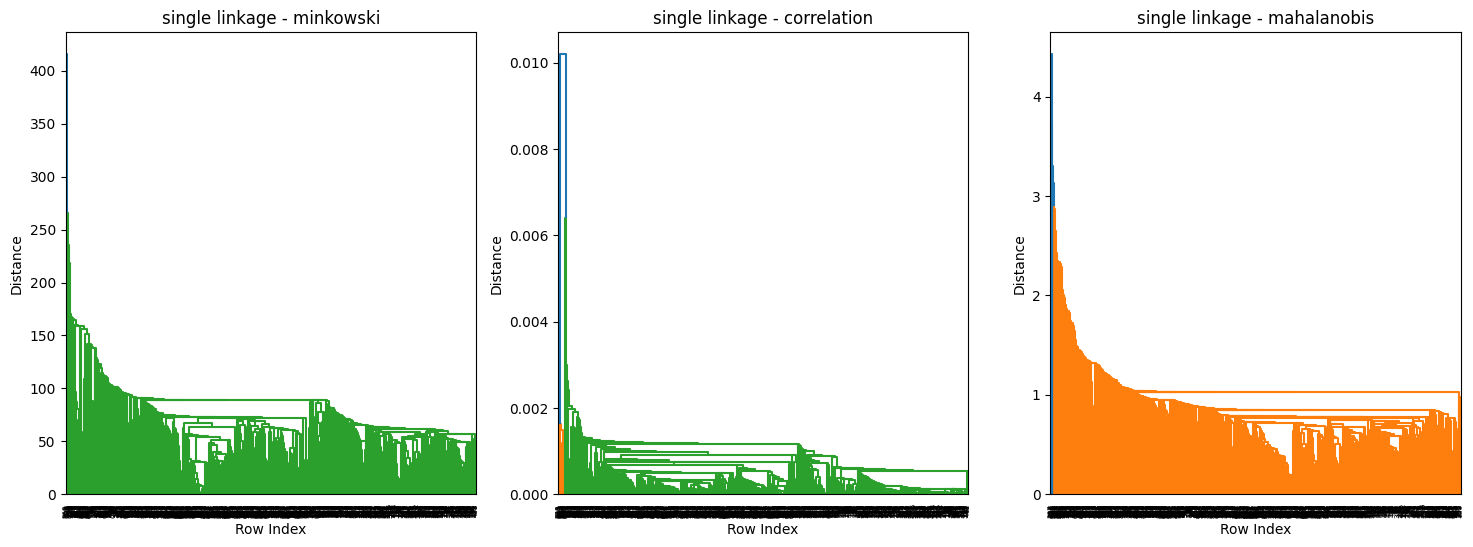

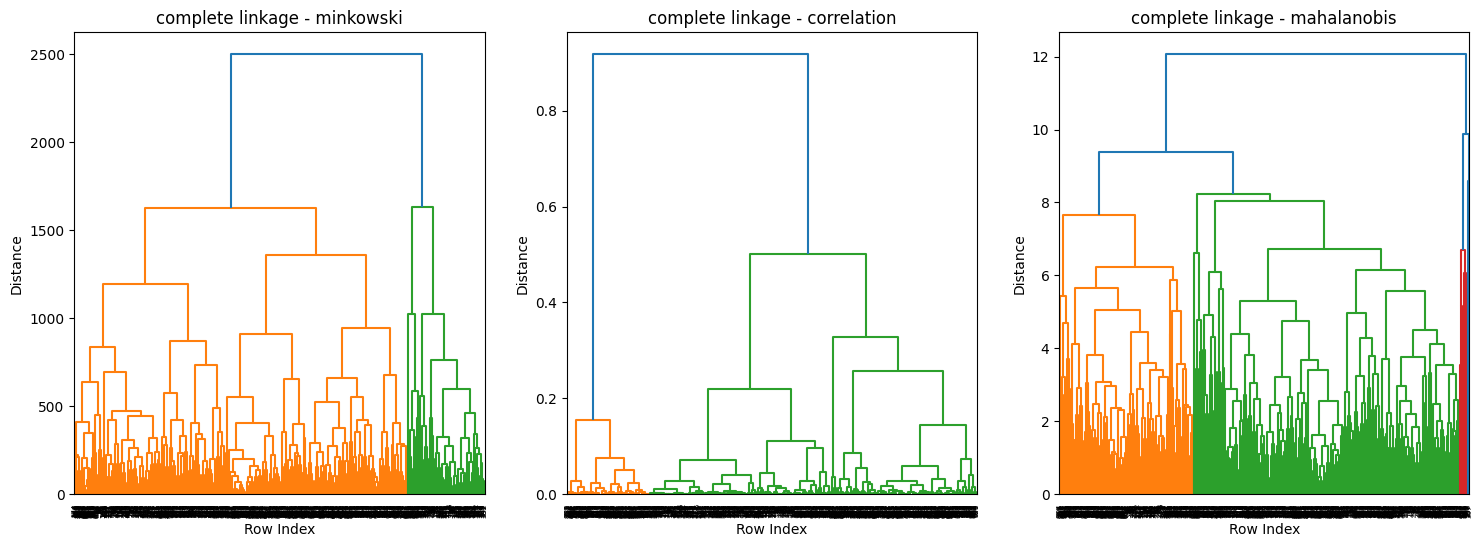

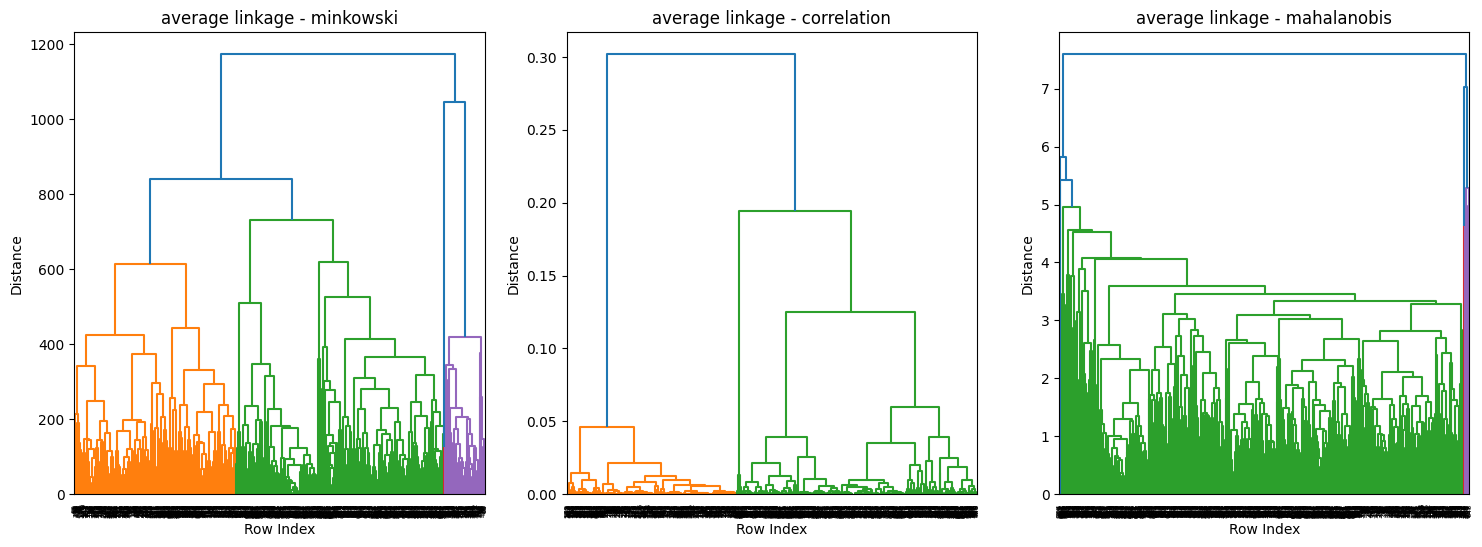

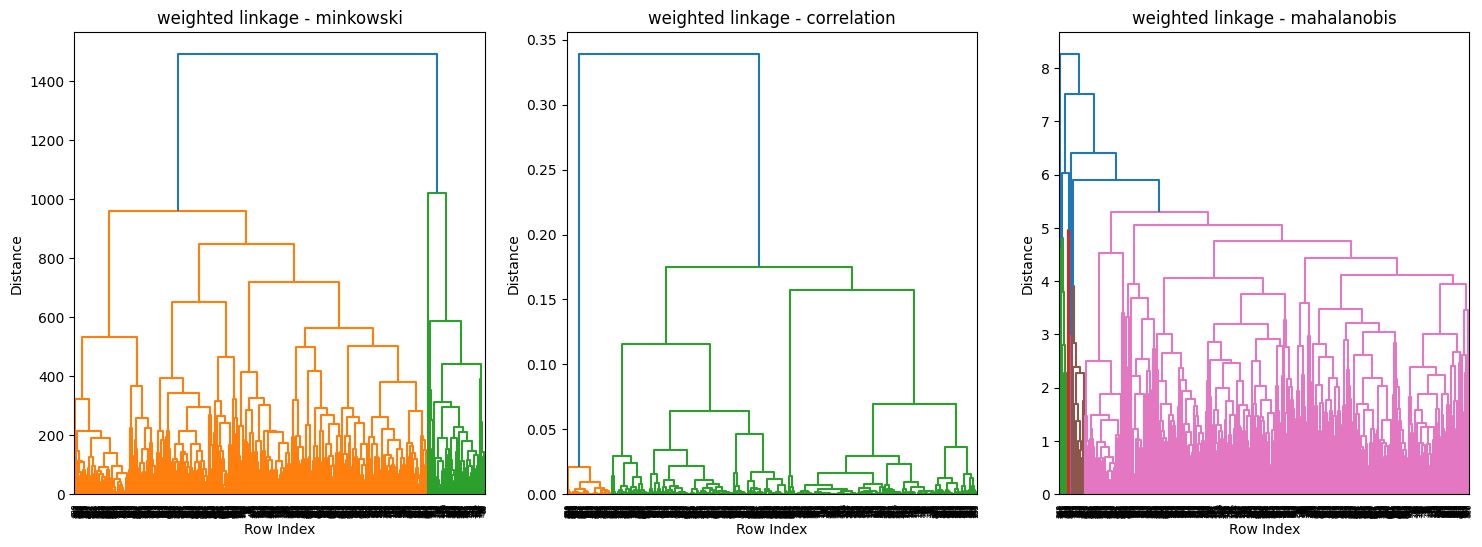

In [5]:
link_methods = ['single', 'complete', 'average', 'weighted']

# minkowski - generalization of Euclidean, Manhattan, and Chebyshev
# correlation - correlation distance
# mahalanobis - how far away a data point is from the distribution, takes correlation into account
diss_metrics = ['minkowski', 'correlation', 'mahalanobis']

for link in link_methods:
    plt.figure(figsize=(18, 6))
    num_plots = len(diss_metrics)
    plot = 1
    for metric in diss_metrics:
        plt.subplot(1, num_plots, plot)
        dendrogram(linkage(basins_df, metric=metric, method=link))
        plt.title(f'{link} linkage - {metric}')
        plt.xlabel('Row Index')
        plt.ylabel('Distance')
        plot += 1
    plt.show()

### Same graphs, but only the first 5 levels

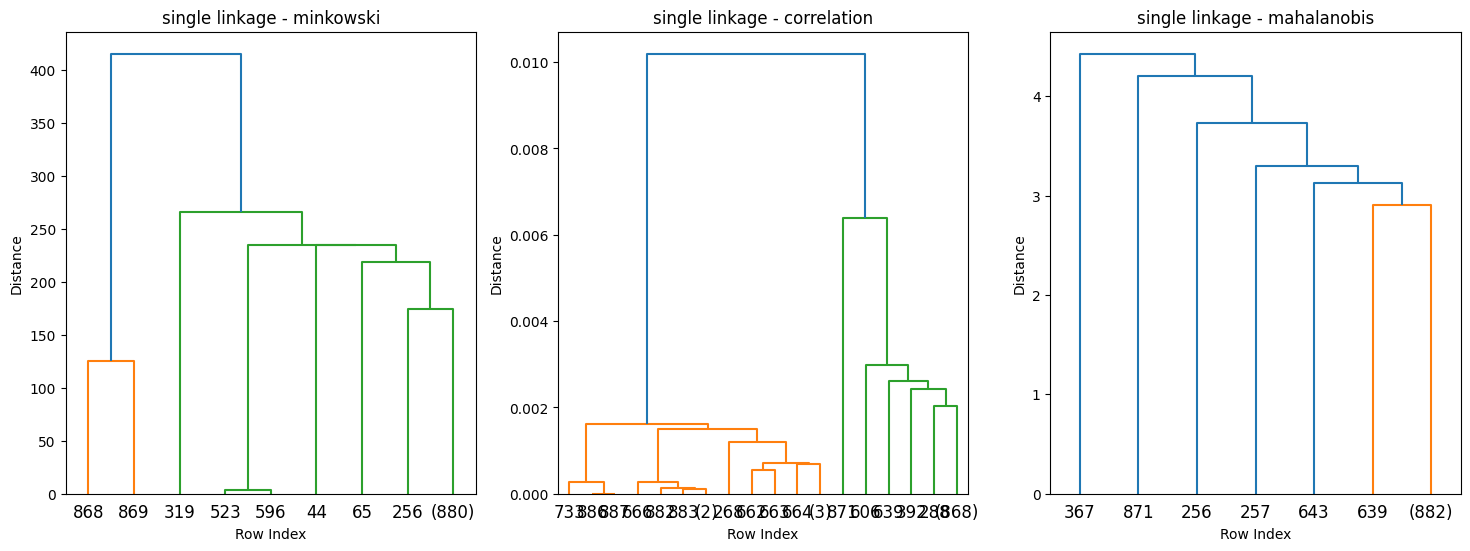

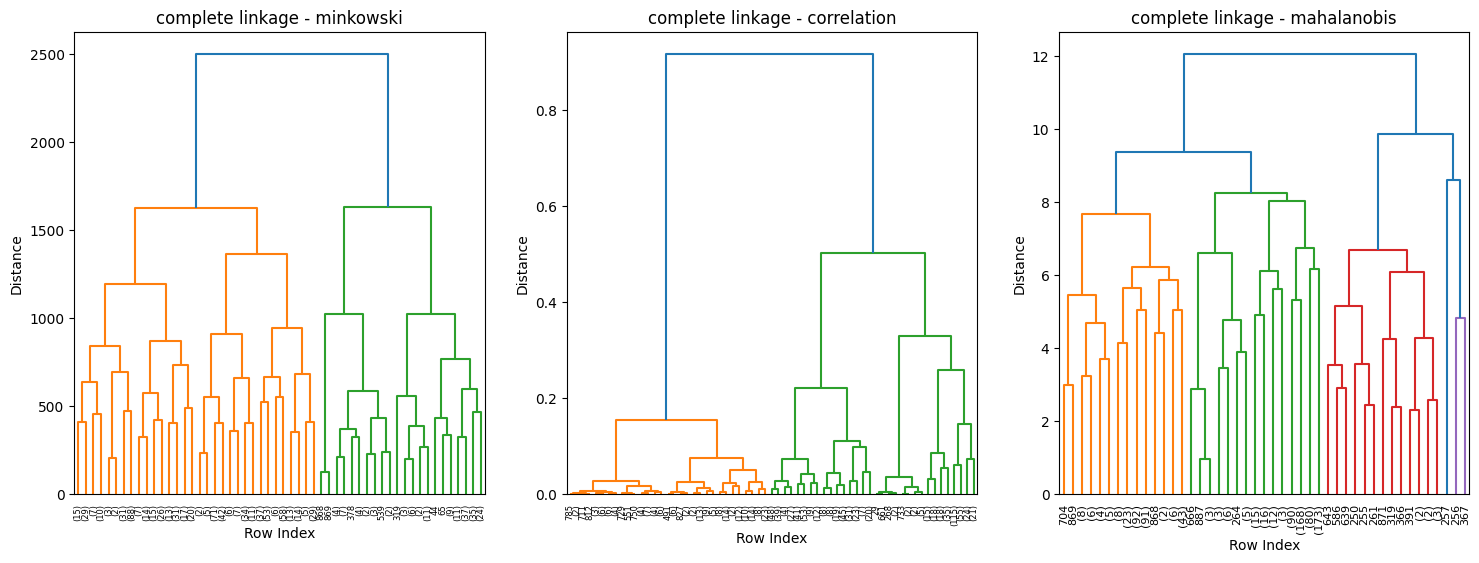

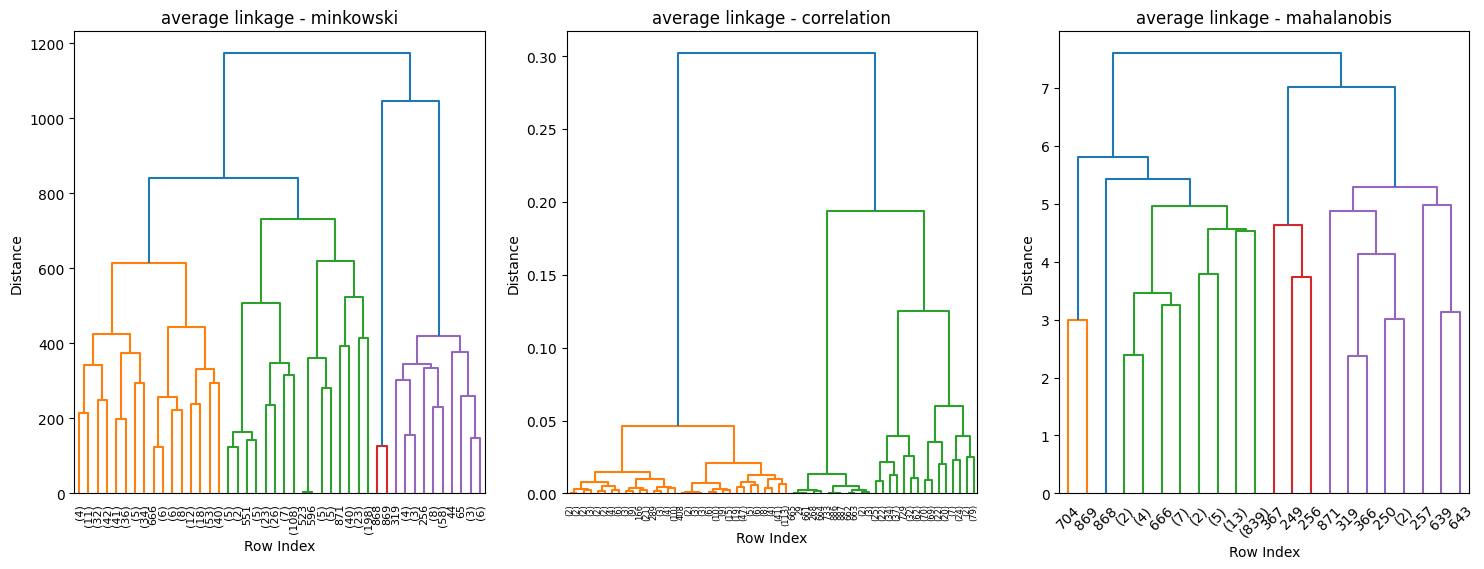

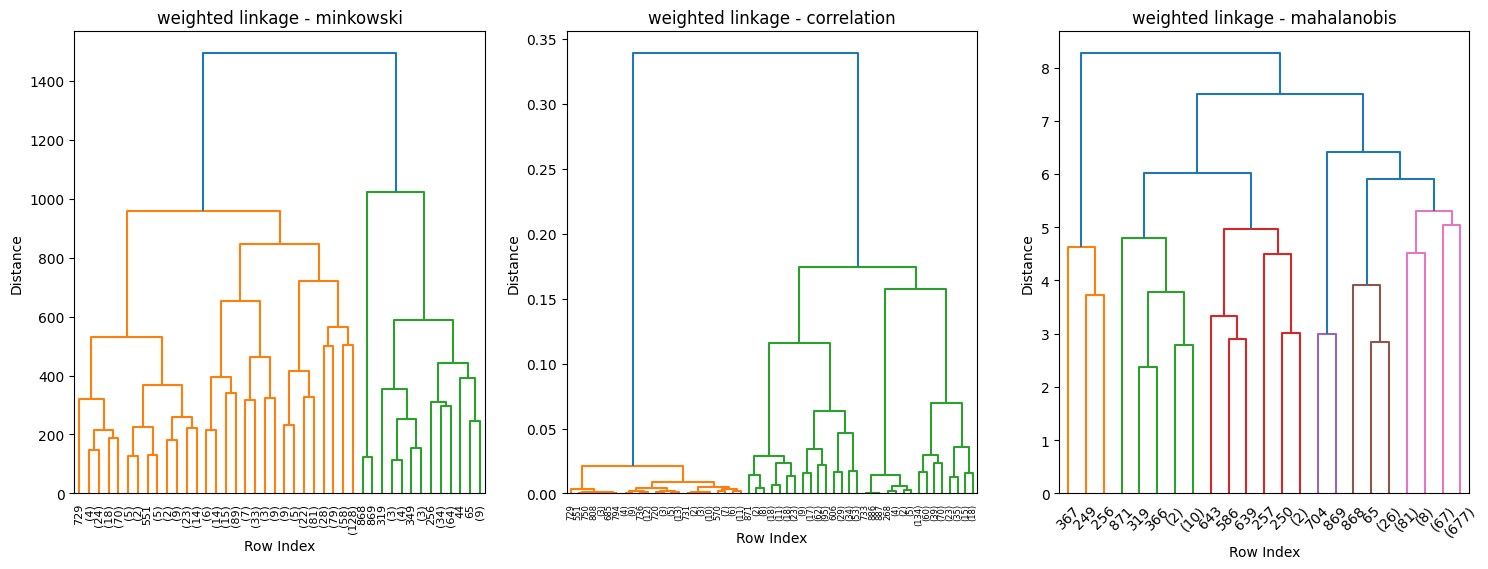

In [6]:
for link in link_methods:
    plt.figure(figsize=(18, 6))
    num_plots = len(diss_metrics)
    plot = 1
    for metric in diss_metrics:
        plt.subplot(1, num_plots, plot)
        dendrogram(linkage(basins_df, metric=metric, method=link), truncate_mode='level', p=5)
        plt.title(f'{link} linkage - {metric}')
        plt.xlabel('Row Index')
        plt.ylabel('Distance')
        plot += 1
    plt.show()

## 2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

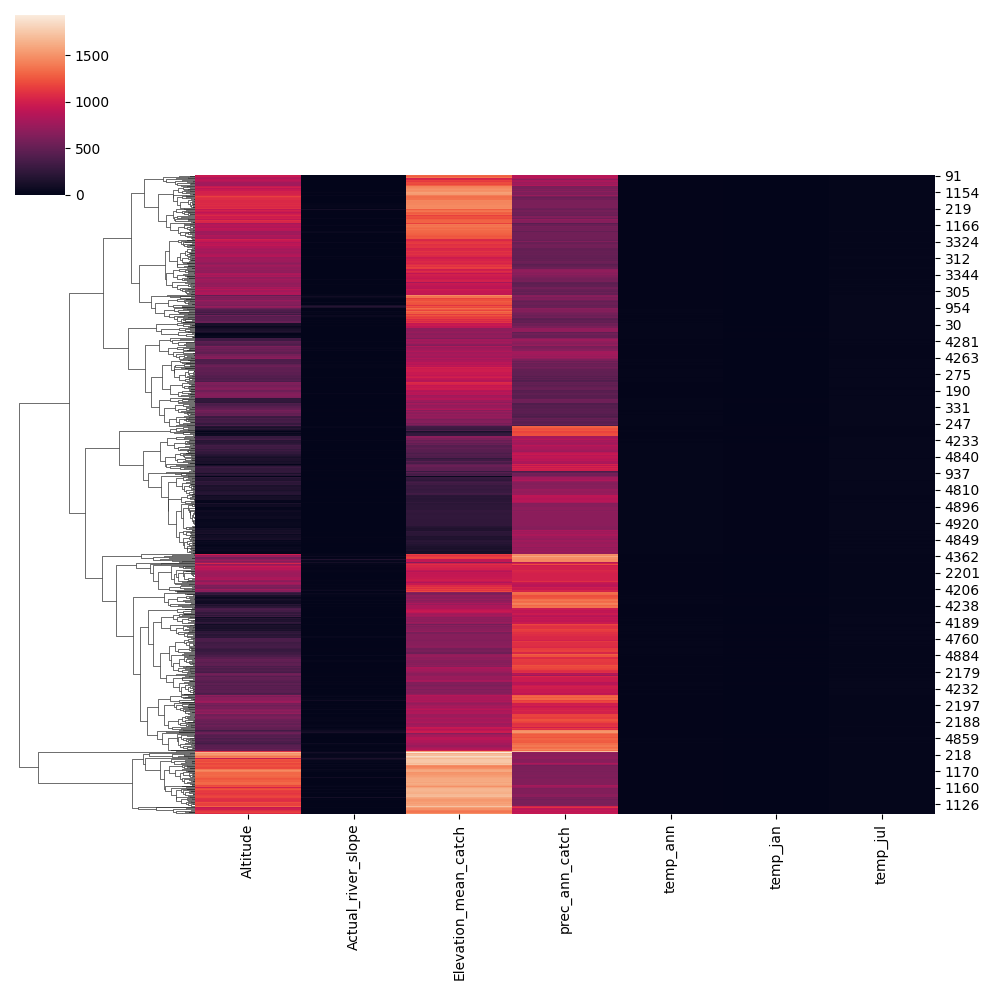

In [7]:
sns.clustermap(basins_df, col_cluster=False, row_cluster=True, method='average')
plt.show()

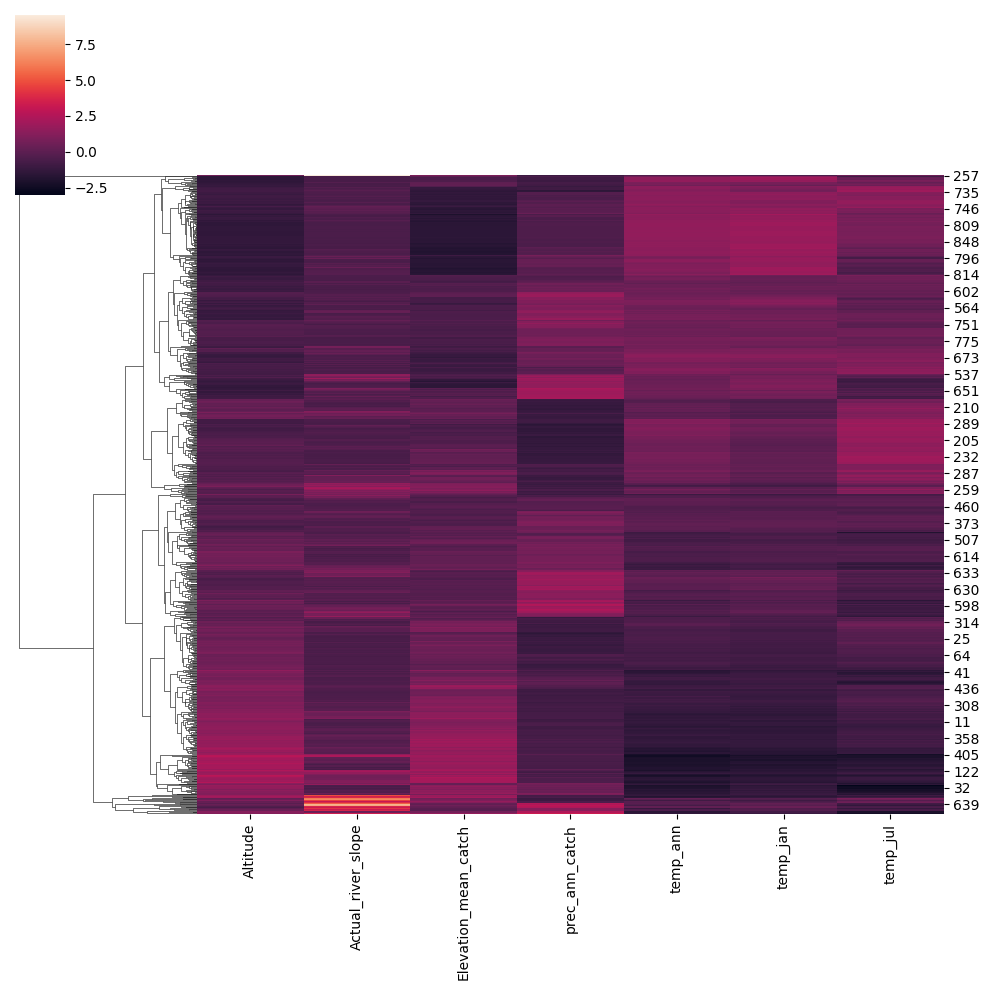

In [8]:
# clustermap but standardizing variable results
scaler = StandardScaler()
basins_scaled = scaler.fit_transform(basins_df)
scaled_df = pd.DataFrame(basins_scaled, columns=basins_df.columns)

sns.clustermap(scaled_df, col_cluster=False, row_cluster=True, method='average')
plt.show()

## 3. Plot a dendrogram that clusters the environmental variables instead (columns) using average linkage - discuss how this would help to select variables for e.g. a regression-based analysis

(NOTE: to transpose a dataframe use "name of the dataframe".T)

In [9]:
transposed_basins = basins_df.T

transposed_basins.index

Index(['Altitude', 'Actual_river_slope', 'Elevation_mean_catch',
       'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul'],
      dtype='object')

In [10]:
transposed_basins

,1,2,3,4,5,6,7,8,9,10,...,4942,4943,4944,4945,4946,4947,4948,4949,4950,4951
Altitude,1253.000000,1155.000000,1074.000000,1018.000000,979.00000,899.000000,836.000000,793.000000,1074.000000,988.000000,...,510.000000,460.000000,291.000000,719.000,50.000000,38.000000,26.000000,20.000000,13.000000,13.000000
Actual_river_slope,13.406000,9.398000,8.186000,11.736000,2.67000,6.692000,2.745000,2.943000,7.217000,6.511000,...,7.400000,8.200000,11.000000,25.300,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
Elevation_mean_catch,1603.519424,1578.678579,1553.219128,1539.684999,1493.91401,1469.388938,1348.888641,1307.488987,1358.809912,1311.215439,...,696.099166,753.372807,588.213718,838.082,707.054385,704.675069,702.673201,697.730192,679.784324,678.426582
prec_ann_catch,640.327779,633.238847,625.841858,622.111415,608.14617,601.459687,563.677450,554.143191,557.870200,546.705025,...,1139.124517,1266.014637,1155.072338,1006.210,513.404304,515.039678,516.097287,518.386401,556.028518,556.481186
temp_ann,9.300000,10.100000,10.100000,10.300000,10.60000,11.000000,11.300000,12.100000,9.900000,10.400000,...,14.400000,14.300000,15.200000,12.300,17.200000,17.100000,17.100000,16.700000,16.700000,16.800000
temp_jan,0.600000,1.200000,1.200000,1.700000,1.80000,2.100000,2.500000,3.000000,1.300000,1.600000,...,7.500000,8.000000,8.700000,4.500,9.900000,10.300000,10.400000,10.800000,10.900000,11.000000
temp_jul,18.900000,19.600000,19.500000,20.000000,20.20000,20.500000,21.000000,21.600000,19.400000,19.800000,...,22.000000,21.100000,21.300000,20.800,24.300000,23.800000,23.600000,22.900000,22.700000,22.600000


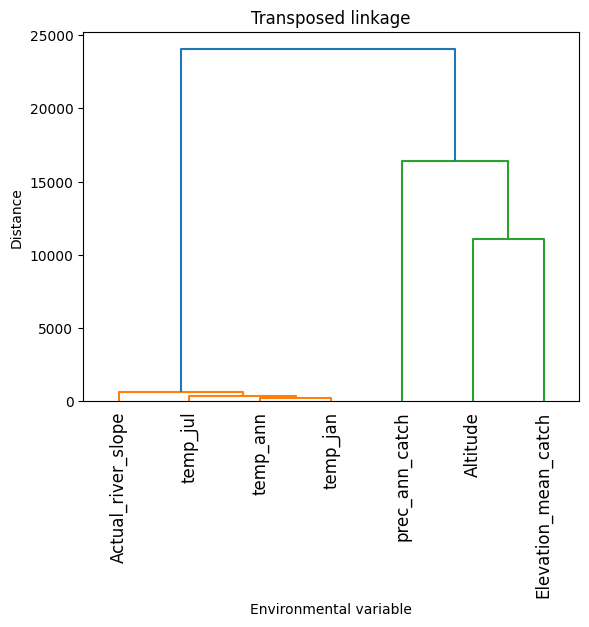

In [11]:
labels = transposed_basins.index.tolist()

dendrogram_plot = dendrogram(linkage(transposed_basins, method='average'), labels=labels)
plt.title('Transposed linkage')
plt.xlabel('Environmental variable')
plt.ylabel('Distance')
plt.xticks(rotation='vertical')
plt.show()

This kind of clustering seems helpful with identifying variables that are likely to be correlated. The distance being relatively close between Actual_river_slope, temp_jul, temp_ann, and temp_jan shows that the results of those variables are very similar, and so adding all of them to a regression is likely to cause multicollinearity issues. To add more weight to this point, in the last question of Exercise 8 where we were removing variables that had high correlation, I only kept temp_jul out of these 4 variables.